# Reacción-Difusión-Advección con EDOs Neuronales Aumentadas

La reacción de Belousov-Zhabotinsky (BZ) es una reacción química oscilante que sirve como un ejemplo clásico de un sistema dinámico no lineal. La reacción BZ involucra múltiples especies químicas y múltiples reacciones, y la concentración de las especies químicas cambia en el tiempo y en el espacio.

La ecuación de reacción-difusión-advección para una de las especies químicas en la reacción BZ puede tener la forma siguiente:

$$
\dfrac{\partial c}{\partial t} = D \dfrac{\partial^2 c}{\partial x^2} - u \dfrac{\partial c}{\partial x} + R(c)
$$

donde:

- $ c $ es la concentración de la especie química.
- $ t $ es el tiempo.
- $ x $ es la coordenada espacial.
- $ D $ es el coeficiente de difusión.
- $ u $ es la velocidad de advección.
- $ R(c) $ es la tasa de reacción, que depende de la concentración de todas las especies químicas presentes.

La función $ R(c) $ es específica de la reacción química que se está considerando. Para la reacción BZ, $ R(c) $ puede ser bastante compleja debido a la cantidad de especies químicas y reacciones involucradas.

Para resolver esta ecuación utilizando EDOs Neuronales Aumentadas, tendríamos que seguir los siguientes pasos:

1. Generar datos sintéticos resolviendo numéricamente la ecuación de reacción-difusión-advección para la reacción BZ. Esto podría hacerse utilizando un solucionador de ecuaciones diferenciales parciales (PDEs) como el método de elementos finitos o el método de diferencias finitas.

2. Entrenar un modelo de EDOs Neuronales Aumentadas en los datos sintéticos. El modelo tomaría como entrada el tiempo $ t $ y la coordenada espacial $ x $, y produciría como salida la concentración $ c $ de una o más especies químicas.

3. Evaluar el rendimiento del modelo comparando las predicciones del modelo con los datos sintéticos o con datos experimentales.

Dado que generar datos sintéticos para la reacción BZ es un proceso complejo que requiere resolver numéricamente una PDE, y dado que el entrenamiento de un modelo de EDOs Neuronales Aumentadas en estos datos puede requerir una cantidad significativa de recursos computacionales, este proceso puede ser bastante desafiante.

## Generación de datos sintéticos

Para generar datos sintéticos, necesitamos resolver la ecuación de reacción-difusión-advección para la reacción BZ. La reacción BZ es un sistema complejo que involucra múltiples especies químicas y reacciones. Una forma comúnmente utilizada para modelar la reacción BZ es el modelo de Oregonator, que es un sistema de ecuaciones diferenciales ordinarias (ODEs) que describe la concentración de varias especies químicas en función del tiempo.

El modelo de Oregonator puede ser descrito por el siguiente sistema de ODEs:

\begin{align*}
\frac{du}{dt} &= f(u) - v + D_u \frac{\partial^2 u}{\partial x^2} - u \frac{\partial v}{\partial x} \\
\frac{dv}{dt} &= u - v + D_v \frac{\partial^2 v}{\partial x^2} + v \frac{\partial u}{\partial x}
\end{align*}

donde $u$ y $v$ son las concentraciones de dos de las especies químicas en la reacción, $f(u)$ es una función que describe la tasa de reacción, y $D_u$ y $D_v$ son los coeficientes de difusión de $u$ y $v$, respectivamente.

Para generar datos sintéticos, tendríamos que resolver este sistema de ODEs para un conjunto de condiciones iniciales y parámetros dados. Esto generaría un conjunto de datos de series temporales que podríamos utilizar para entrenar el modelo de EDOs Neuronales Aumentadas.

A continuación, implementaremos y resolveremos el modelo de Oregonator para generar los datos sintéticos. Luego, utilizaremos estos datos para entrenar el modelo.


In [1]:
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
# def oregonator(t, y, Du, Dv, f):
#     u, v = y
#     dudt = f(u) - v + Du * u**2 - u*v
#     dvdt = u - v + Dv * v**2 + v*u
#     return [dudt, dvdt]

In [3]:
def oregonator(t, y, q):
    u, v = y
    f = lambda u: u**2 / (1 + u**2)
    dudt = f(u) - q*v
    dvdt = u - f(u)
    return np.array([dudt, dvdt])

In [4]:
# Método de Runge-Kutta de cuarto orden
def runge_kutta_4(f, y0, t, args):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        dt = t[i+1] - t[i]
        k1 = f(t[i], y[i], *args)
        k2 = f(t[i] + dt/2, y[i] + dt*k1/2, *args)
        k3 = f(t[i] + dt/2, y[i] + dt*k2/2, *args)
        k4 = f(t[i+1], y[i] + dt*k3, *args)
        y[i+1] = y[i] + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    return y

In [5]:
# Parámetros
a = 0.1
q = 0.1
Du = 1e-5
Dv = 2e-5
f = lambda u: u**2 / (1 + u**2)

In [6]:
# Condiciones iniciales
u0 = 1.0
v0 = 0.0
y0 = [u0, v0]

In [7]:
# Intervalo de tiempo
t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 100)

In [8]:
# # Resolver el sistema de ODEs
# sol = solve_ivp(oregonator, t_span, y0, t_eval=t_eval, args=(Du, Dv, f))

# Resolver el sistema de ODEs
sol = runge_kutta_4(oregonator, y0, t_eval, args=(q,))

In [9]:
# # Extraer los resultados
# t = sol.t
# u = sol.y[0]
# v = sol.y[1]

# Extraer los resultados
u = sol[:, 0]
v = sol[:, 1]

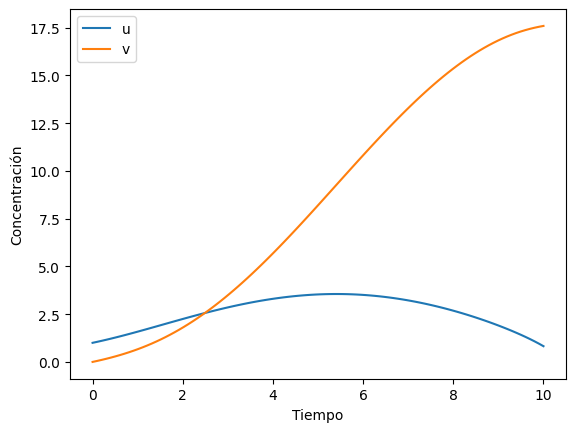

In [10]:
# Graficar los resultados
import matplotlib.pyplot as plt

plt.plot(t_eval, u, label='u')
plt.plot(t_eval, v, label='v')
plt.xlabel('Tiempo')
plt.ylabel('Concentración')
plt.legend()
plt.show()

## Procesameinto de datos

In [11]:
# Normalizar los datos
u_max = np.max(u)
v_max = np.max(v)
u_norm = u / u_max
v_norm = v / v_max

In [12]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(t_eval))
u_train = u_norm[:train_size]
v_train = v_norm[:train_size]
t_train = t_eval[:train_size]
u_test = u_norm[train_size:]
v_test = v_norm[train_size:]
t_test = t_eval[train_size:]

In [13]:
# Transformar los datos para el entrenamiento
X_train = np.vstack((t_train, u_train)).T
y_train = v_train
X_test = np.vstack((t_test, u_test)).T
y_test = v_test

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

In [15]:
# Definir el modelo de EDOs Neuronales Aumentadas
class NeuralODE(nn.Module):
    def __init__(self):
        super(NeuralODE, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 20),
            nn.Tanh(),
            nn.Linear(20, 40),
            nn.Tanh(),
            nn.Linear(40,20),
            nn.Linear(20, 1)
        )
    
    def forward(self, t, x):
        return self.net(torch.cat((t.unsqueeze(1), x.unsqueeze(1)), dim=1))

In [16]:
# Crear el modelo
model = NeuralODE()
model

NeuralODE(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=40, bias=True)
    (3): Tanh()
    (4): Linear(in_features=40, out_features=20, bias=True)
    (5): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [17]:
# Mover el modelo a la GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando {device}')
model = model.to(device)

Usando cuda


In [18]:
# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [19]:
t_tensor = torch.tensor(t_eval, dtype=torch.float32)
u_tensor = torch.tensor(u_norm, dtype=torch.float32)
v_tensor = torch.tensor(v_norm, dtype=torch.float32)

In [20]:
# Convertir los datos a tensores de PyTorch y moverlos a la GPU
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

In [21]:
# Entrenar el modelo
n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor[:, 0], X_train_tensor[:, 1])
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

/home/matcraft/anaconda3/envs/TORCHDIFF-venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 100/1000, Loss: 0.0780138298869133
Epoch 200/1000, Loss: 0.07801199704408646
Epoch 300/1000, Loss: 0.07801155000925064
Epoch 400/1000, Loss: 0.07801135629415512
Epoch 500/1000, Loss: 0.07801124453544617
Epoch 600/1000, Loss: 0.078011155128479
Epoch 700/1000, Loss: 0.07801108807325363
Epoch 800/1000, Loss: 0.07801102101802826
Epoch 900/1000, Loss: 0.07801096886396408
Epoch 1000/1000, Loss: 0.0780109167098999


In [22]:
# Evaluar el modelo en los datos de prueba
model.eval()
y_pred_test = model(X_test_tensor[:, 0], X_test_tensor[:, 1])
test_loss = criterion(y_pred_test, y_test_tensor)
print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.34597235918045044


/home/matcraft/anaconda3/envs/TORCHDIFF-venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [23]:
# Evaluar el modelo
model.eval()
v_pred = model(t_tensor.to(device), u_tensor.to(device))

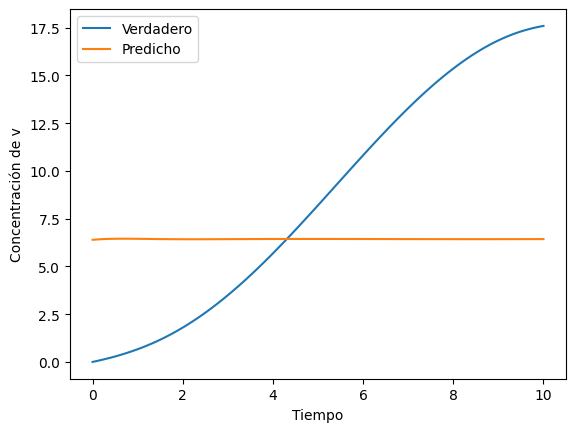

In [24]:
# Desnormalizar las predicciones
v_pred = v_pred.squeeze().cpu().detach().numpy() * v_max

# Graficar los resultados
plt.plot(t_eval, v, label='Verdadero')
plt.plot(t_eval, v_pred, label='Predicho')
plt.xlabel('Tiempo')
plt.ylabel('Concentración de v')
plt.legend()
plt.show()